**Support Vector Machine**

---



---


1. **Data Cleaning**
2. **Data Processing**
3. **Apply SVC**  
4. **Model Evaluaiton** 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Disease.csv')

**1. Data Cleaning**

---



In [ ]:
# Extracting Minum Age from Age Category Column
df['AgeCategory'] = df['AgeCategory'].replace(('80 or older'), ('80-0'))
df['AgeCategory']=df['AgeCategory'].str.replace(pat=r'-',repl=' ', regex=False)
df['AgeCategory']=df['AgeCategory'].str.split()
df['Min AgeCategory'] = df['AgeCategory'].apply(lambda x: x[0])
df['AgeCategory'] = df['Min AgeCategory'].astype('int')


In [ ]:
df['AgeCategory'] # updated feature with Minimum age

0         55
1         80
2         65
3         75
4         40
          ..
319790    60
319791    35
319792    45
319793    25
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

In [ ]:
df = df[~(df['BMI']>42)] # Removing outliers from the BMI column

In [ ]:
df = df.drop(['Min AgeCategory'], axis = 1)

In [ ]:
df = df.drop_duplicates() # Drop Duplicates

**2. Data Processing**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
x.shape

(290579, 17)

In [ ]:
from imblearn.under_sampling import NearMiss
nrms = NearMiss()

In [ ]:
X, Y = nrms.fit_resample(x, y)

In [ ]:
X.shape

(51980, 17)

In [ ]:
Y.value_counts()

0    25990
1    25990
Name: HeartDisease, dtype: int64

In [ ]:
x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

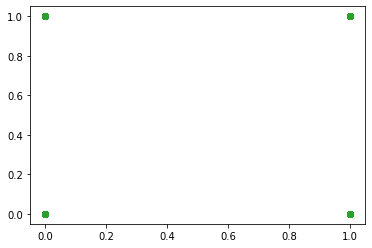

In [ ]:
plt.scatter(x.Sex, df.HeartDisease)
plt.scatter(x.AlcoholDrinking, df.KidneyDisease)
plt.scatter(x.Sex, df.HeartDisease)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=.70, random_state=42)

In [ ]:
xtest.shape

(15594, 17)

**3. Applying SVC Model**

---



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc1 = SVC()

In [ ]:
# svc1.fit(xtrain, ytrain)

In [ ]:
# svc1.score(xtest, ytest)

In [ ]:
# List of C values
import numpy as np
C_range = np.logspace(-1, 1, 3)


In [ ]:

grids = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly', 'sigmoid'],
    }


**3.1 Hyper Paramter Tuning**

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define Randomized search
rcv = RandomizedSearchCV(svc1, grids, n_iter=50, cv=5)
# Fit grid searc
rcv_result = rcv.fit(xtrain, ytrain)
# Print grid search summary
rcv_result

In [ ]:
# rcv_result.best_params_

In [ ]:
# svc2 = rcv_result.best_estimator_

In [ ]:
svc2 = SVC(kernel= 'rbf', C= 10.0) # Creating model object with tuning paramter

In [ ]:
svc1.fit(xtrain, ytrain) # without tuning

SVC()

In [ ]:
svc1.score(xtest, ytest) # score wiithout tuning

0.8271129921764782

In [ ]:
svc2.fit(xtrain, ytrain) # with tuning parameter

SVC(C=10.0)

In [ ]:
svc2.score(xtest, ytest) # score with tuning parameter

0.8562267538796973

In [ ]:
pred2 = svc2.predict(xtest) # Storing predicting result

**4. Model Evaluation**

---



In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, RocCurveDisplay

In [ ]:
print(classification_report(ytest,pred2)) # Model performance between actual testing value and predicted testing value

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7733
           1       0.95      0.75      0.84      7861

    accuracy                           0.86     15594
   macro avg       0.87      0.86      0.85     15594
weighted avg       0.87      0.86      0.85     15594



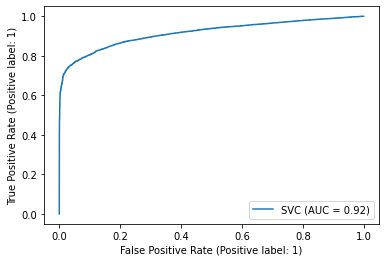

In [ ]:
# Plotting ROC curve
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(svc2, xtest, ytest)
plt.show()

In [ ]:
test_confusion_matrix = confusion_matrix(ytest,pred2)

In [ ]:
test_confusion_matrix # tp, fp, fn, tn

array([[7431,  302],
       [1940, 5921]])

4.1 **Cross Validation**

---



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = KFold(n_splits=5, shuffle=True) # define K-Fold cross validation object

In [ ]:
result = cross_val_score(svc1, X, Y, cv=kfold) 

In [ ]:
result

array([0.83214698, 0.8287803 , 0.82425933, 0.82714506, 0.82522124])

In [ ]:
result.mean()

0.8287225856098498